In [73]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pylab as pl
from sklearn import svm
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import itertools
%matplotlib inline

In [74]:
cell_df = pd.read_csv('E:\ml\classification project\patient.csv')
cell_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
cell_df.shape

(303, 14)

In [76]:
X= cell_df[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']].values
X[0:13]

array([[6.30e+01, 1.00e+00, 3.00e+00, 1.45e+02, 2.33e+02, 1.00e+00,
        0.00e+00, 1.50e+02, 0.00e+00, 2.30e+00, 0.00e+00, 0.00e+00,
        1.00e+00],
       [3.70e+01, 1.00e+00, 2.00e+00, 1.30e+02, 2.50e+02, 0.00e+00,
        1.00e+00, 1.87e+02, 0.00e+00, 3.50e+00, 0.00e+00, 0.00e+00,
        2.00e+00],
       [4.10e+01, 0.00e+00, 1.00e+00, 1.30e+02, 2.04e+02, 0.00e+00,
        0.00e+00, 1.72e+02, 0.00e+00, 1.40e+00, 2.00e+00, 0.00e+00,
        2.00e+00],
       [5.60e+01, 1.00e+00, 1.00e+00, 1.20e+02, 2.36e+02, 0.00e+00,
        1.00e+00, 1.78e+02, 0.00e+00, 8.00e-01, 2.00e+00, 0.00e+00,
        2.00e+00],
       [5.70e+01, 0.00e+00, 0.00e+00, 1.20e+02, 3.54e+02, 0.00e+00,
        1.00e+00, 1.63e+02, 1.00e+00, 6.00e-01, 2.00e+00, 0.00e+00,
        2.00e+00],
       [5.70e+01, 1.00e+00, 0.00e+00, 1.40e+02, 1.92e+02, 0.00e+00,
        1.00e+00, 1.48e+02, 0.00e+00, 4.00e-01, 1.00e+00, 0.00e+00,
        1.00e+00],
       [5.60e+01, 0.00e+00, 1.00e+00, 1.40e+02, 2.94e+02, 0.00e+00,
  

In [77]:
y = cell_df["output"]
y[0:13]

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
Name: output, dtype: int64

In [78]:
cell_df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

<AxesSubplot:>

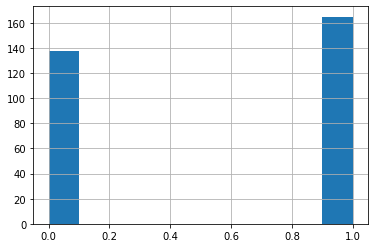

In [79]:
cell_df['output'].hist()

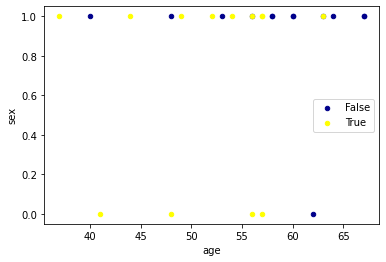

In [80]:
ax = cell_df[cell_df['output'] == 0][0:13].plot(kind='scatter', x='age', y='sex', color='DarkBlue', label='False');
cell_df[cell_df['output'] == 1][0:13].plot(kind='scatter', x='age', y='sex', color='Yellow', label='True', ax=ax);
plt.show()

In [81]:
cell_df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [82]:
cell_df = cell_df[pd.to_numeric(cell_df['oldpeak'], errors='coerce').notnull()]
cell_df['oldpeak'] = cell_df['oldpeak'].astype('int')
cell_df.dtypes

age         int64
sex         int64
cp          int64
trtbps      int64
chol        int64
fbs         int64
restecg     int64
thalachh    int64
exng        int64
oldpeak     int32
slp         int64
caa         int64
thall       int64
output      int64
dtype: object

In [83]:
feature_df = cell_df[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']]
X = np.asarray(feature_df)
X[0:13]

array([[ 63,   1,   3, 145, 233,   1,   0, 150,   0,   2,   0,   0,   1],
       [ 37,   1,   2, 130, 250,   0,   1, 187,   0,   3,   0,   0,   2],
       [ 41,   0,   1, 130, 204,   0,   0, 172,   0,   1,   2,   0,   2],
       [ 56,   1,   1, 120, 236,   0,   1, 178,   0,   0,   2,   0,   2],
       [ 57,   0,   0, 120, 354,   0,   1, 163,   1,   0,   2,   0,   2],
       [ 57,   1,   0, 140, 192,   0,   1, 148,   0,   0,   1,   0,   1],
       [ 56,   0,   1, 140, 294,   0,   0, 153,   0,   1,   1,   0,   2],
       [ 44,   1,   1, 120, 263,   0,   1, 173,   0,   0,   2,   0,   3],
       [ 52,   1,   2, 172, 199,   1,   1, 162,   0,   0,   2,   0,   3],
       [ 57,   1,   2, 150, 168,   0,   1, 174,   0,   1,   2,   0,   2],
       [ 54,   1,   0, 140, 239,   0,   1, 160,   0,   1,   2,   0,   2],
       [ 48,   0,   2, 130, 275,   0,   1, 139,   0,   0,   2,   0,   2],
       [ 49,   1,   1, 130, 266,   0,   1, 171,   0,   0,   2,   0,   2]],
      dtype=int64)

In [84]:
cell_df['output'] = cell_df['output'].astype('int')
y = np.asarray(cell_df['output'])
y [0:13]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [85]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (212, 13) (212,)
Test set: (91, 13) (91,)


In [109]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [110]:
yhat = clf.predict(X_test)
yhat [0:13]

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [111]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.72      0.47      0.57        38
           1       0.70      0.87      0.77        53

    accuracy                           0.70        91
   macro avg       0.71      0.67      0.67        91
weighted avg       0.71      0.70      0.69        91

Confusion matrix, without normalization
[[18 20]
 [ 7 46]]


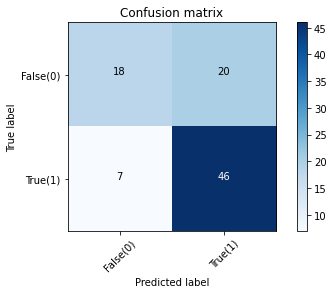

In [112]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=1)
print (classification_report(y_test, yhat))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['False(0)','True(1)'],normalize= False,  title='Confusion matrix')

In [113]:
heartStrokeTree = DecisionTreeClassifier( max_depth = 4)
heartStrokeTree

DecisionTreeClassifier(max_depth=4)

In [114]:
heartStrokeTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(max_depth=4)

In [115]:
predTree =heartStrokeTree .predict(X_testset)

In [116]:
print (predTree [0:13])
print (y_testset [0:13])

[1 1 1 1 0 0 0 0 0 1 0 0 0]
[0 1 1 1 1 1 0 0 0 1 1 0 1]


In [117]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7692307692307693
